In [147]:
# Libraries
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [148]:
# Loading the dataset
data = pd.read_csv('employee.csv')

In [149]:
# Explore the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [150]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [151]:
print(data.head())

   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...

In [152]:
data.tail()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,...,1,80,0,6,3,4,4,3,1,2


In [153]:
data.shape

(1470, 35)

In [154]:
data['Attrition'].value_counts()

Attrition
No     1233
Yes     237
Name: count, dtype: int64

<Axes: xlabel='Attrition', ylabel='count'>

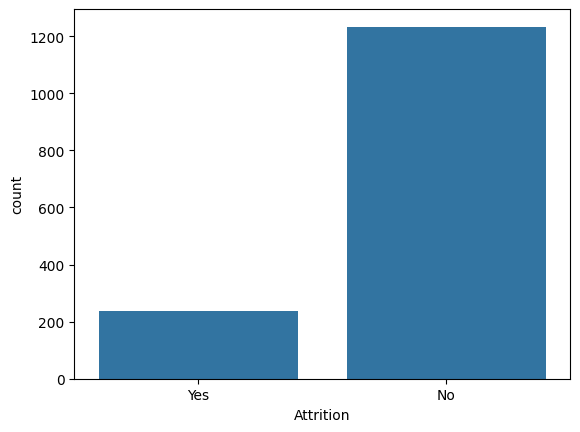

In [155]:
sns.countplot(data=data, x='Attrition')

In [156]:
object_col = []
for column in data.columns:
    if data[column].dtype == object and len(data[column].unique()) <= 30:
        object_col.append(column)
        print(f"{column} : {data[column].unique()}")
        print(data[column].value_counts())
        print("-----------------------------------------------------------")
object_col.remove('Attrition')

Attrition : ['Yes' 'No']
Attrition
No     1233
Yes     237
Name: count, dtype: int64
-----------------------------------------------------------
BusinessTravel : ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64
-----------------------------------------------------------
Department : ['Sales' 'Research & Development' 'Human Resources']
Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64
-----------------------------------------------------------
EducationField : ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: count, dtype: int64
-----------------------------------------------------------
Gender 

In [157]:
disc_col = []
for column in data.columns:
    if data[column].dtypes != object and data[column].nunique() < 30:
        print(f"{column} : {data[column].unique()}")
        disc_col.append(column)
        print("----------------------------------------------------")

DistanceFromHome : [ 1  8  2  3 24 23 27 16 15 26 19 21  5 11  9  7  6 10  4 25 12 18 29 22
 14 20 28 17 13]
----------------------------------------------------
Education : [2 1 4 3 5]
----------------------------------------------------
EmployeeCount : [1]
----------------------------------------------------
EnvironmentSatisfaction : [2 3 4 1]
----------------------------------------------------
JobInvolvement : [3 2 4 1]
----------------------------------------------------
JobLevel : [2 1 3 4 5]
----------------------------------------------------
JobSatisfaction : [4 2 3 1]
----------------------------------------------------
NumCompaniesWorked : [8 1 6 9 0 4 5 2 7 3]
----------------------------------------------------
PercentSalaryHike : [11 23 15 12 13 20 22 21 17 14 16 18 19 24 25]
----------------------------------------------------
PerformanceRating : [3 4]
----------------------------------------------------
RelationshipSatisfaction : [1 4 2 3]
------------------------------

In [158]:
cont_col = []
for column in data.columns:
    if data[column].dtypes != object and data[column].nunique() > 30:
        print(f"{column} : Minimum: {data[column].min()}, Maximum: {data[column].max()}")
        cont_col.append(column)
        print("--------------------------------------------")

Age : Minimum: 18, Maximum: 60
--------------------------------------------
DailyRate : Minimum: 102, Maximum: 1499
--------------------------------------------
EmployeeNumber : Minimum: 1, Maximum: 2068
--------------------------------------------
HourlyRate : Minimum: 30, Maximum: 100
--------------------------------------------
MonthlyIncome : Minimum: 1009, Maximum: 19999
--------------------------------------------
MonthlyRate : Minimum: 2094, Maximum: 26999
--------------------------------------------
TotalWorkingYears : Minimum: 0, Maximum: 40
--------------------------------------------
YearsAtCompany : Minimum: 0, Maximum: 40
--------------------------------------------


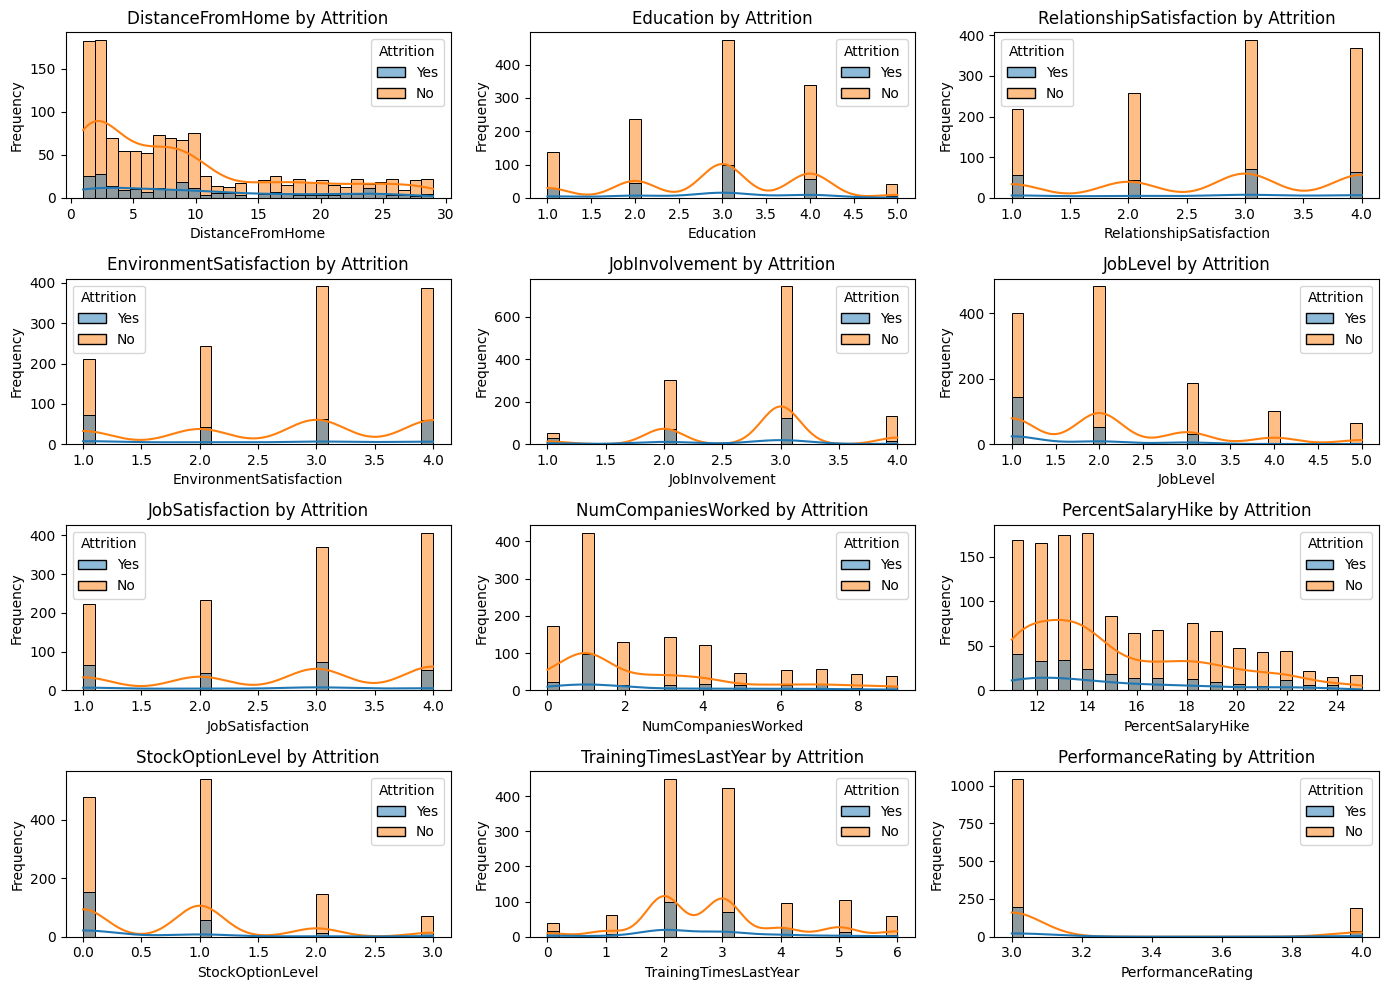

In [159]:
# Columns list for Ploting
columns_to_plot = [
    'DistanceFromHome', 'Education', 'RelationshipSatisfaction', 
    'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel', 
    'JobSatisfaction', 'NumCompaniesWorked', 'PercentSalaryHike', 
    'StockOptionLevel', 'TrainingTimesLastYear', 'PerformanceRating'
]

# Set the figure size
plt.figure(figsize=(14, 10))

# Loop through the columns and create subplots
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(4, 3, i)
    sns.histplot(data=data, x=column, hue='Attrition', bins=30, kde=True)
    plt.title(f'{column} by Attrition')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

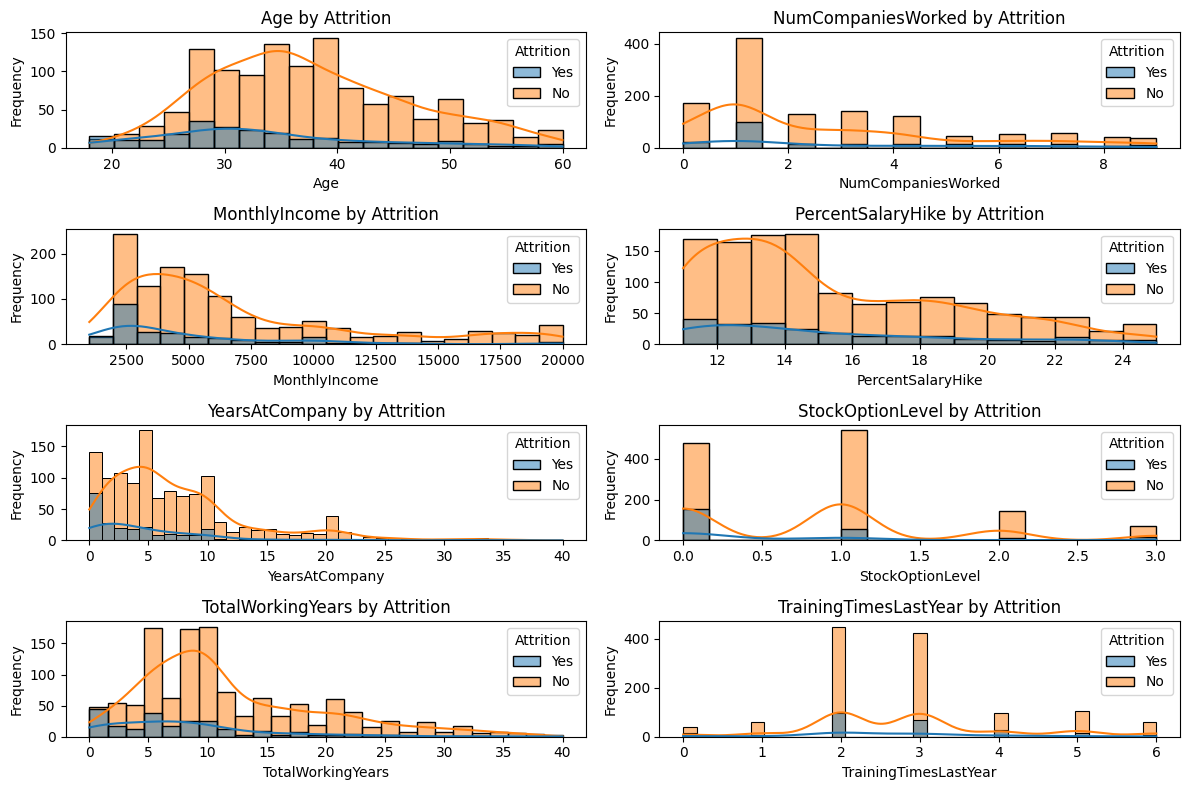

In [160]:
# list of columns to plot
columns_to_plot = [
    ('Age', 35), ('NumCompaniesWorked', None), 
    ('MonthlyIncome', 50), ('PercentSalaryHike', None), 
    ('YearsAtCompany', 35), ('StockOptionLevel', None), 
    ('TotalWorkingYears', 35), ('TrainingTimesLastYear', None)
]

# Set the figure size
plt.figure(figsize=(12, 8))

# Loop through the columns and create subplots
for i, (column, bins) in enumerate(columns_to_plot, 1):
    plt.subplot(4, 2, i)
    sns.histplot(data=data, x=column, hue='Attrition', kde=True)
    plt.title(f'{column} by Attrition')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

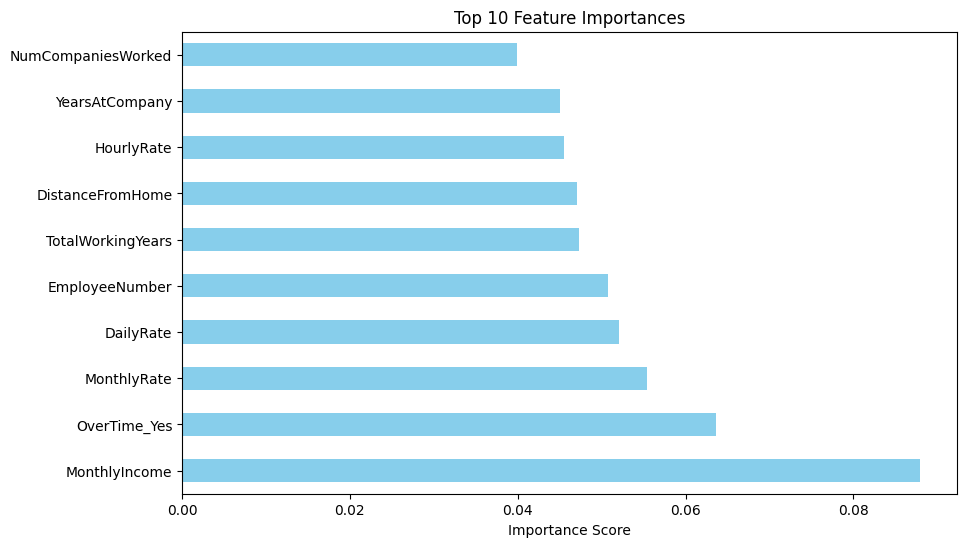

In [161]:
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
top_features = feature_importances.nlargest(10)
top_features.plot(kind='barh', figsize=(10, 6), color='skyblue')
plt.title('Top 10 Feature Importances')
plt.xlabel('Importance Score')
plt.show()

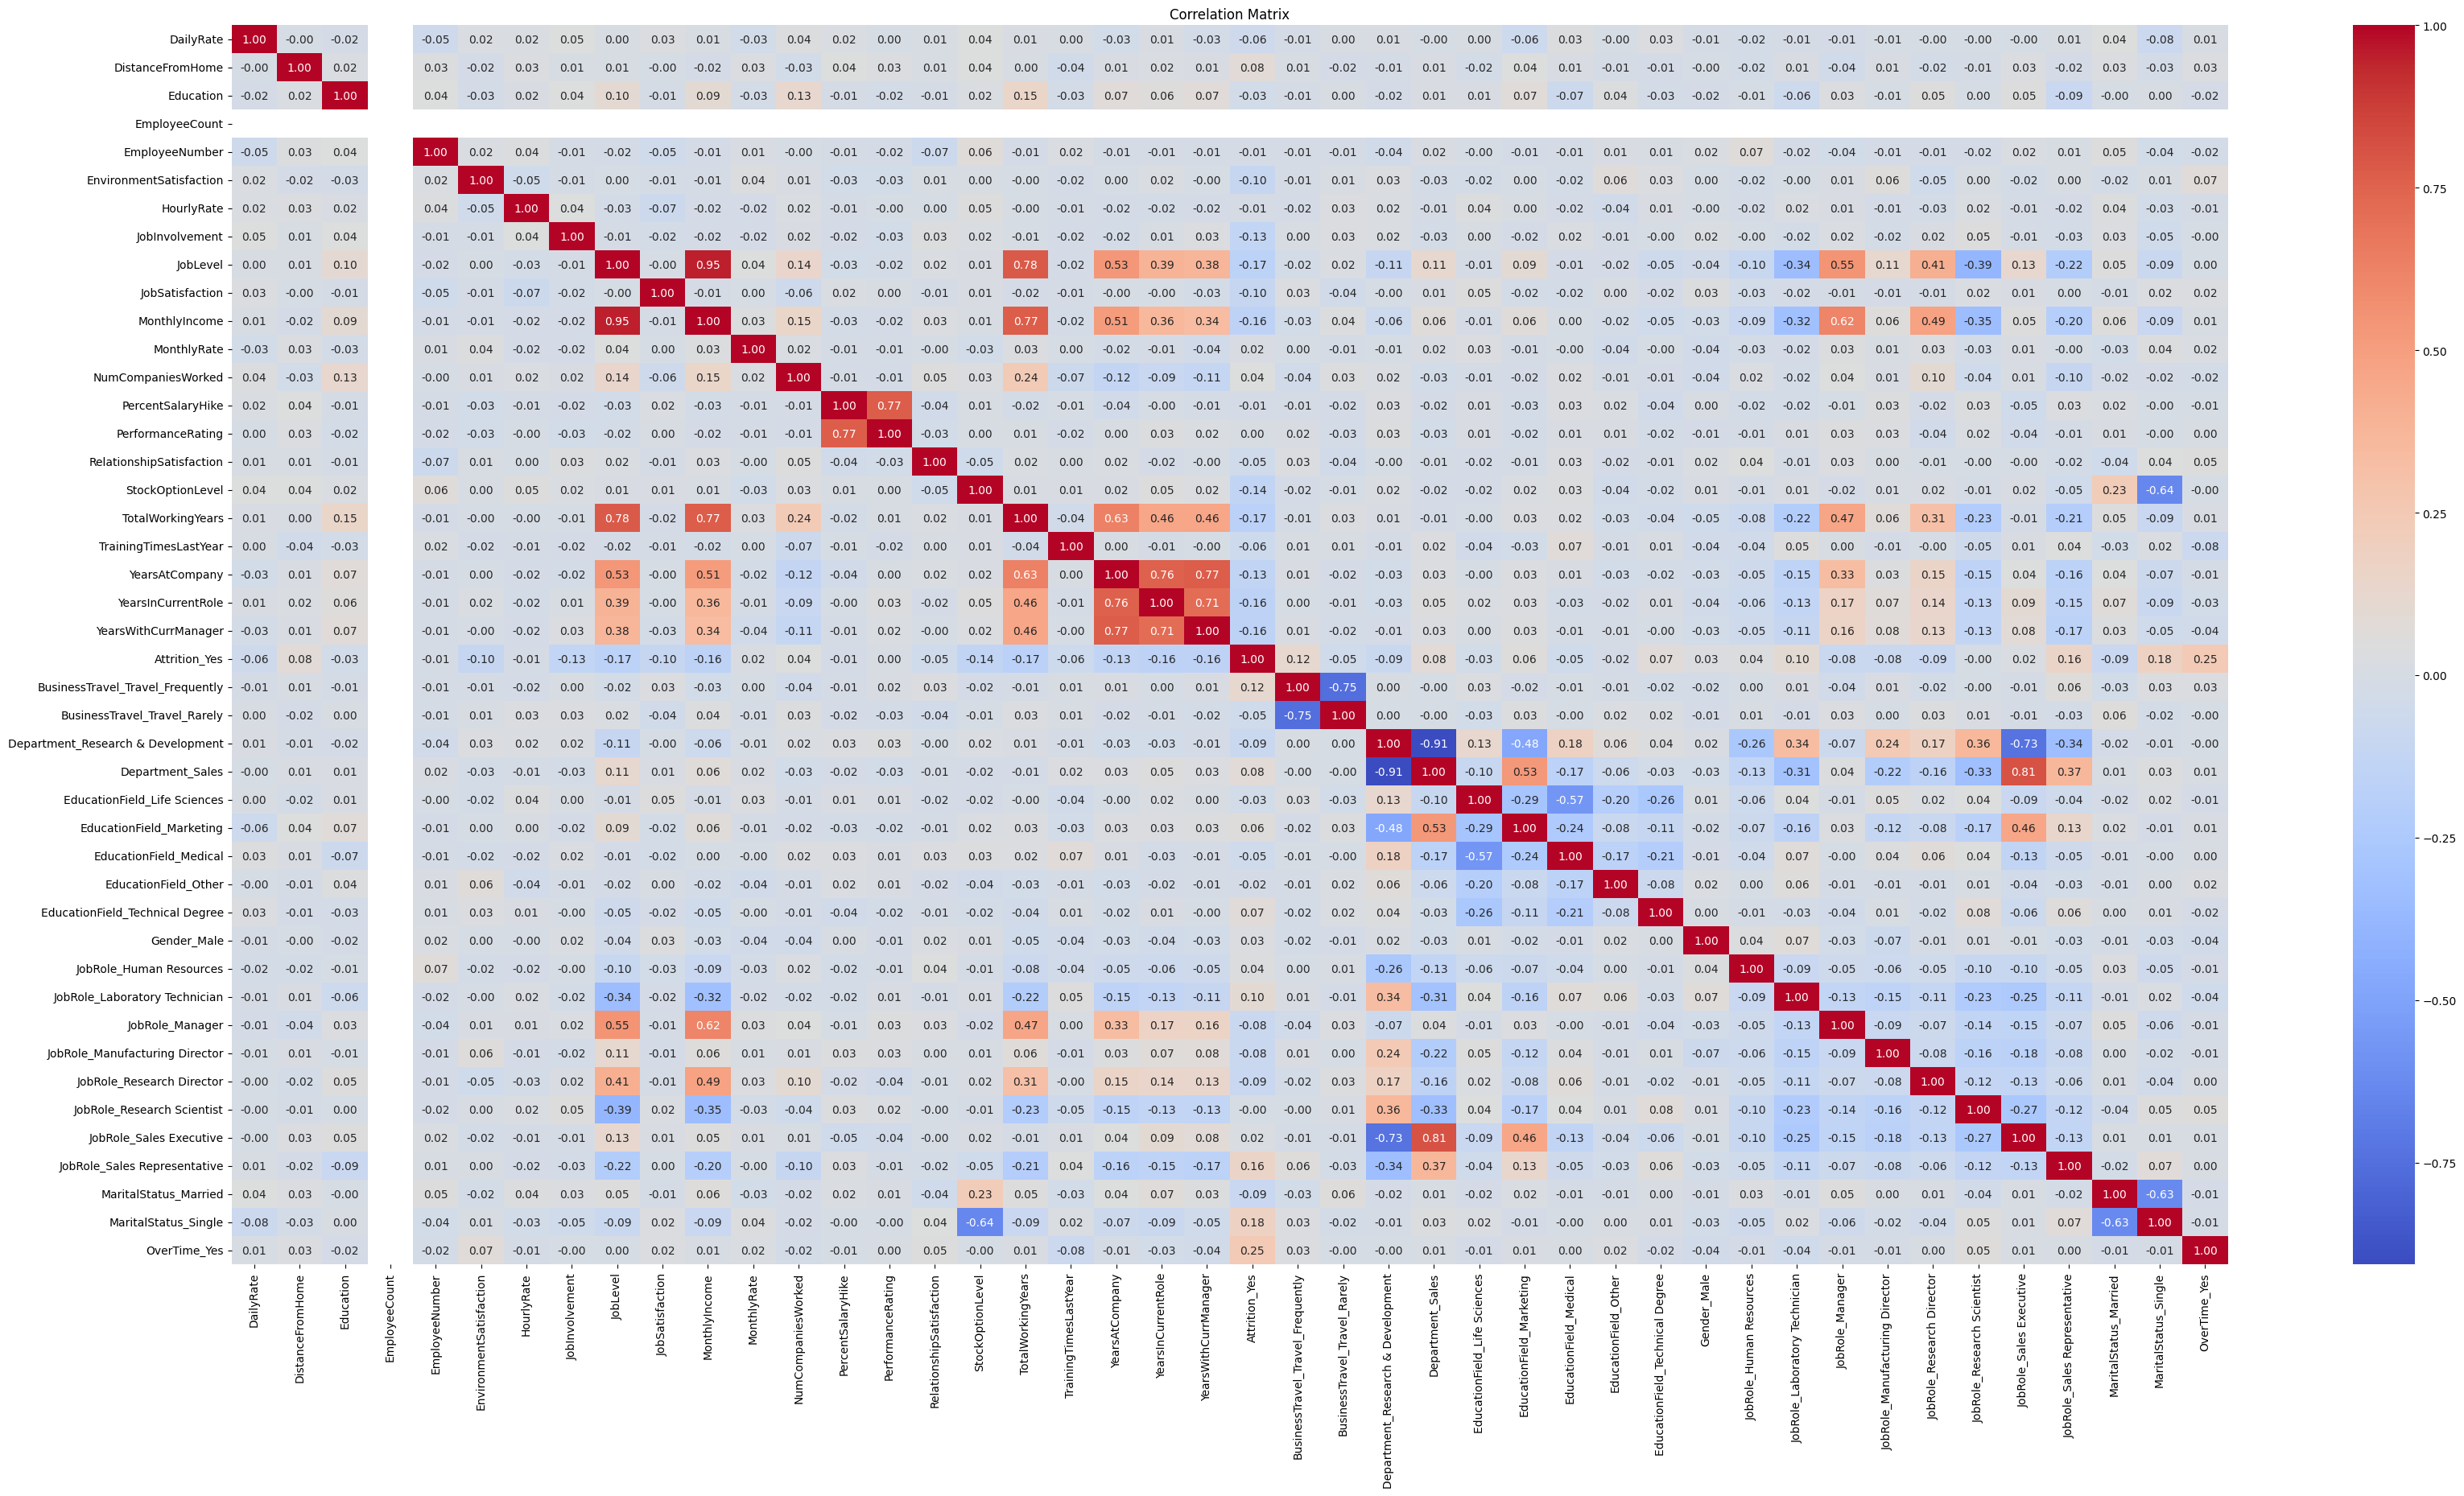

In [168]:
correlation_matrix = data.corr()
plt.figure(figsize=(40, 20))
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=True, fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

C:\Users\Aadil Rayeen\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\Aadil Rayeen\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\Aadil Rayeen\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\Aadil Rayeen\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\Aadil Rayeen\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:1615: UserWarning: Ignoring `palette` be

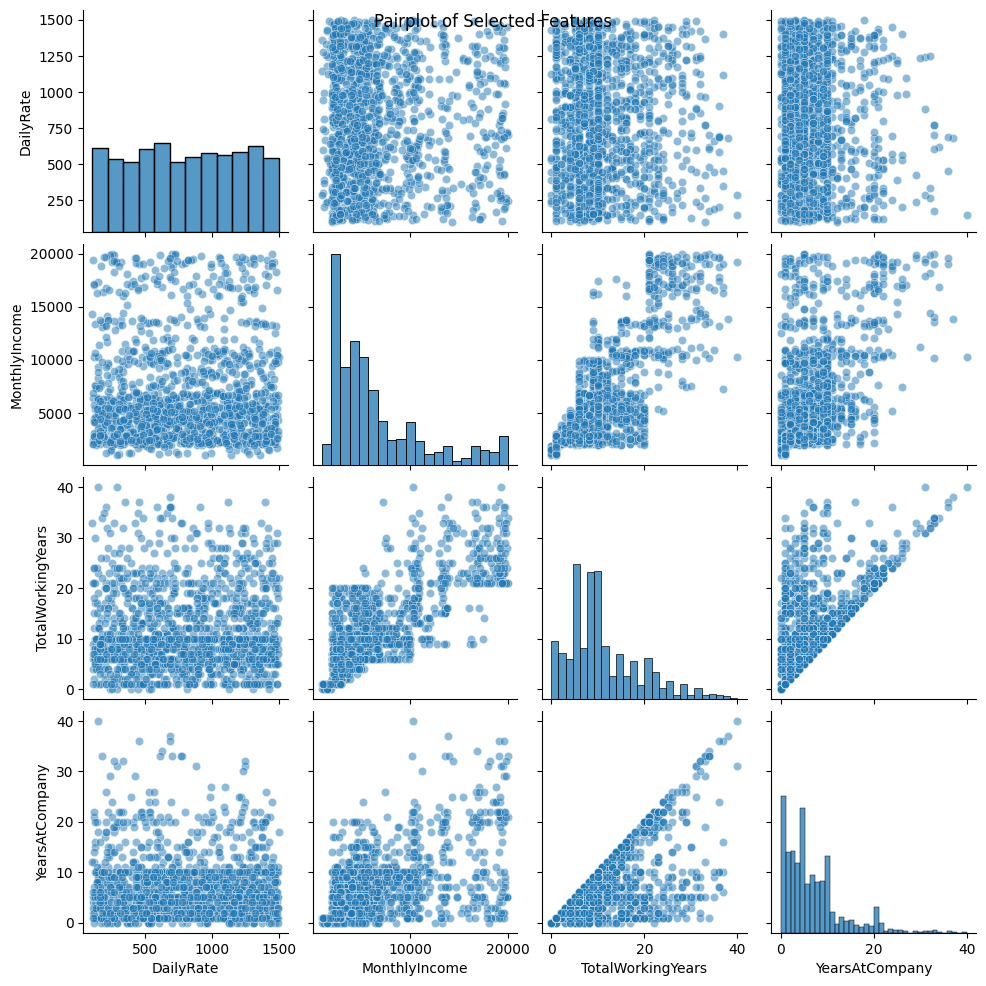

In [169]:
# Pairplot for selected features
selected_features = ['DailyRate', 'MonthlyIncome', 'TotalWorkingYears', 'YearsAtCompany']
sns.pairplot(data[selected_features], palette='husl', plot_kws={'alpha': 0.5})
plt.suptitle('Pairplot of Selected Features')
plt.show()

In [170]:
# Missing values
print(data.isnull().sum())

DailyRate                            0
DistanceFromHome                     0
Education                            0
EmployeeCount                        0
EmployeeNumber                       0
EnvironmentSatisfaction              0
HourlyRate                           0
JobInvolvement                       0
JobLevel                             0
JobSatisfaction                      0
MonthlyIncome                        0
MonthlyRate                          0
NumCompaniesWorked                   0
PercentSalaryHike                    0
PerformanceRating                    0
RelationshipSatisfaction             0
StockOptionLevel                     0
TotalWorkingYears                    0
TrainingTimesLastYear                0
YearsAtCompany                       0
YearsInCurrentRole                   0
YearsWithCurrManager                 0
Attrition_Yes                        0
BusinessTravel_Travel_Frequently     0
BusinessTravel_Travel_Rarely         0
Department_Research & Dev

In [171]:
data = data.drop(['YearsSinceLastPromotion', 'WorkLifeBalance', 'Age', 'StandardHours'], axis=1)
data = pd.get_dummies(data, drop_first=True)

# Split the data into features (X) and target variable (y)
X = data.drop('Attrition_Yes', axis=1)  # Assuming 'Attrition' is the target variable
y = data['Attrition_Yes']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

KeyError: "['YearsSinceLastPromotion', 'WorkLifeBalance', 'Age', 'StandardHours'] not found in axis"

In [ ]:
# RandomForestClassifier Model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

In [172]:
# Evaluating the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8707482993197279

Classification Report:
               precision    recall  f1-score   support

       False       0.88      0.99      0.93       255
        True       0.60      0.08      0.14        39

    accuracy                           0.87       294
   macro avg       0.74      0.53      0.53       294
weighted avg       0.84      0.87      0.82       294


Confusion Matrix:
 [[253   2]
 [ 36   3]]


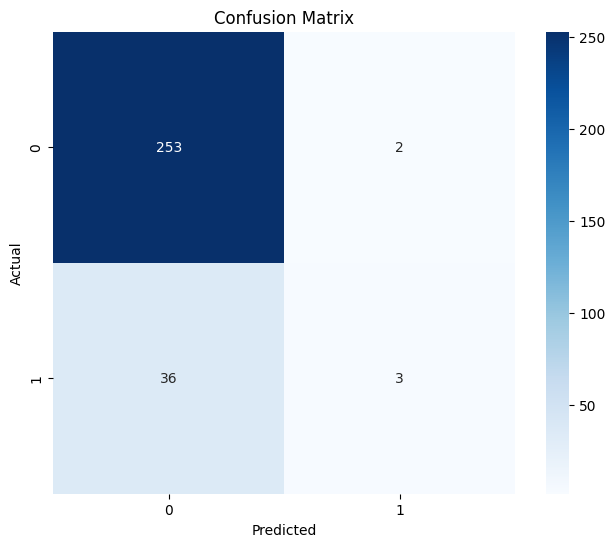

In [173]:
Random_Forest_Confusion_Matrix = confusion_matrix(y_test, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(Random_Forest_Confusion_Matrix, annot=True, fmt='d', cmap='Blues', square=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [174]:
attrition_predictions = model.predict(data.drop('Attrition_Yes', axis=1))

predictions_df = pd.DataFrame({
    'EmployeeNumber': data['EmployeeNumber'],
    'Attrition_Prediction': attrition_predictions
})

result_df = pd.merge(data, predictions_df, on='EmployeeNumber')

employees_predicted_to_leave = result_df[result_df['Attrition_Prediction'] == 1]
print("Number of employees predicted to leave the company:", len(employees_predicted_to_leave))
print("Employees predicted to leave the company:")
print(employees_predicted_to_leave[['EmployeeNumber', 'Attrition_Prediction']])

Number of employees predicted to leave the company: 203
Employees predicted to leave the company:
      EmployeeNumber  Attrition_Prediction
0                  1                  True
2                  4                  True
14                19                  True
21                27                  True
24                31                  True
...              ...                   ...
1438            2023                  True
1442            2027                  True
1444            2032                  True
1452            2044                  True
1461            2055                  True

[203 rows x 2 columns]
